In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#gas setting
T=1000 #K
P=1.0 #bar (total pressure)
VMR=0.01 #CO volume mixing ratio
kB=1.380649e-16
nair=(P*1.e6)/(kB*T) #gas number density (cgs)
L=100 #cm
nCO=VMR*nair #CO number density (cgs)

In [3]:
#cross section
from exojax.spec import AutoXS
from exojax.spec.rtransfer import nugrid

nus,wav,res=nugrid(22920,23000,3000,unit="AA")
autoxs=AutoXS(nus,"ExoMol","CO") #using ExoMol CO (12C-16O). HITRAN and HITEMP are also supported.  
xsv=autoxs.xsection(T,P) #cross section for 1000K, 1bar (cm2)

nugrid is log: mode= lpf
Recommendated database by ExoMol:  Li2015
CO/12C-16O/Li2015
broadf= True
Background atmosphere:  H2
Reading transition file
.broad is used.
Broadening code level= a0
default broadening parameters are used for  71  J lower states in  152  states


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

# of lines= 135
LPF selected


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.18it/s]


In [4]:
#absorption 
import jax.numpy as jnp
def absmodel(n,L,sigma):
    """
    Args:
        n: number density (cm-3)
        L: path length (cm)
        sigma: cross section (cm2)
        
    """
    return jnp.exp(-n*L*sigma)

In [6]:
#hello a spectrum
spec=absmodel(nCO,L,xsv)

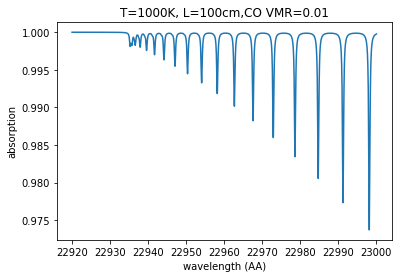

In [7]:
plt.plot(wav[::-1],spec)
plt.xlabel("wavelength (AA)")
plt.ylabel("absorption")
plt.title("T="+str(T)+"K, "+"L="+str(L)+"cm"+",CO VMR="+str(VMR))
plt.savefig("CO1m.png")

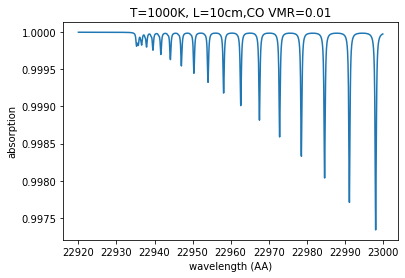

In [9]:
#hello a spectrum
L_=10 #cm
spec=absmodel(nCO,L_,xsv)
plt.plot(wav[::-1],spec)
plt.xlabel("wavelength (AA)")
plt.ylabel("absorption")

plt.title("T="+str(T)+"K, "+"L="+str(L_)+"cm"+",CO VMR="+str(VMR))
plt.savefig("CO10cm.png")

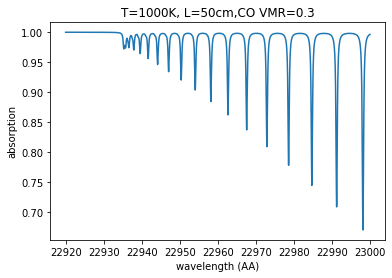

In [13]:
#hello a spectrum
VMR=0.3 #CO volume mixing ratio
nCO_=VMR*nair #CO number density (cgs)
L__=50 #cm
spec=absmodel(nCO_,L__,xsv)
plt.plot(wav[::-1],spec)
plt.xlabel("wavelength (AA)")
plt.ylabel("absorption")

plt.title("T="+str(T)+"K, "+"L="+str(L__)+"cm"+",CO VMR="+str(VMR))
plt.savefig("COx.png")